# Lead Case Study



Problem statement:
    
   X Education sells online courses to industry professionals. X Education needs help in selecting the most promising leads, the leads that are most likely to convert into paying customers.
    
   The company needs a model wherein a lead score assigned to each of the leads such that the customer with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.

# Importing necessary libraries:

In [1]:

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# for Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Reading and Inspecting the dataset

In [3]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Size of database
print('-'*100)
print("Size of Database:",leads.size)
print('-'*100)
# Number of Rows and Columns in database
print("dimension of Database  :",leads.shape)
print('-'*100)

----------------------------------------------------------------------------------------------------
Size of Database: 341880
----------------------------------------------------------------------------------------------------
dimension of Database  : (9240, 37)
----------------------------------------------------------------------------------------------------


In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking the stats summary of the data:
leads.describe(percentiles =[0.25,.50,.75,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Handling and Cleaning

#### Converting all the 'Selects' to NaN

In [7]:
#Converting all selects to NaN as the user didn't select any option from the list and "Select" is as good as "NaN"

leads = leads.replace('Select', np.nan)

#### Dropping unnecessary columns

In [8]:
leads = leads.drop(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','City','Country'], axis = 1 )

#### We observed that there are multiple columns which contains data of a single value only.As these columns do not contribute towards any inference, we can remove them from further analysis

### Handling Null or Missing Values

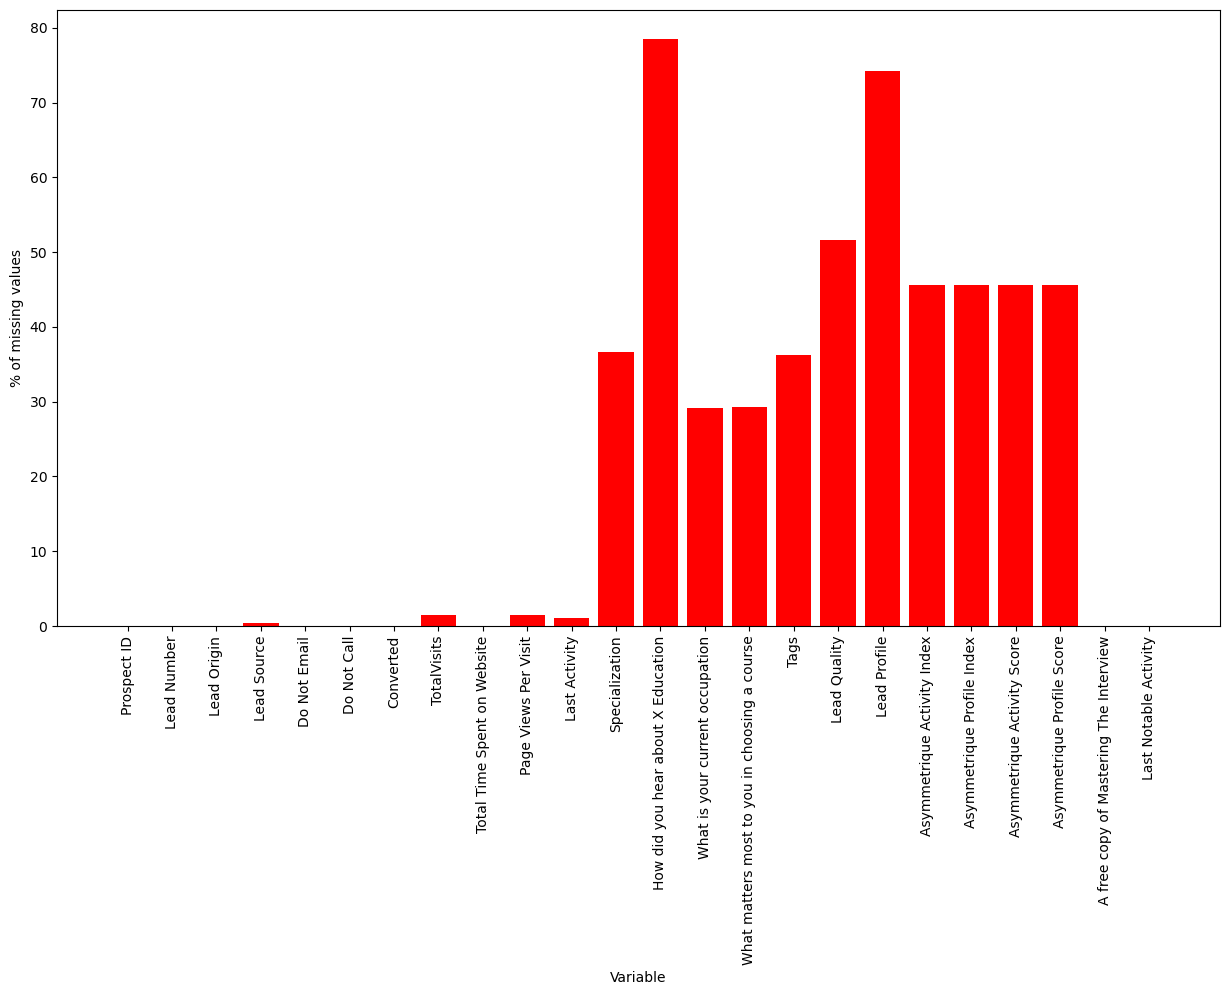

In [9]:
# Create bar chart of missing values
missing_percent = leads.isna().mean() * 100

plt.figure(figsize=(15, 8))
plt.bar(missing_percent.index, missing_percent.values, color ="Red")
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('% of missing values')
plt.show()


In [10]:
# checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
Asymmetriq

In [11]:
# To help us predict well, we will drop off columns with missing values above 40%
missingval_40 = list(round(100*(leads.isnull().sum()/len(leads.index)), 2)[round(100*(leads.isnull().sum()/len(leads.index)), 2) > 40].index)
leads = leads.drop(missingval_40, axis =1)

### Droping and Imputing

In [12]:
# Checking the missing values before imputing
round(100*(leads.isnull().sum()/len(leads.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

In [13]:
# The data in the column Lead Source is skwed so we will replace it with values that are highly occuring
print(leads['Lead Source'].value_counts())
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release', 'Social Media',
                          'testone', 'WeLearn', 'blog','Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM','Welingak Website','Referral Sites'],'Other')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace(np.NaN,'Google')
print(leads['Lead Source'].value_counts())
print('Missing values count --->', leads['Lead Source'].isna().sum())

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64
Missing values count ---> 0


In [14]:
# For 'TotalVisits','Page Views Per Visit','Last Activity','Tags' we will impute all the missing values with label having max occurences
missing = ['TotalVisits','Page Views Per Visit','Last Activity','Tags']

for i in leads[missing].columns:
    max_str = leads[i].value_counts()[leads[i].value_counts() == leads[i].value_counts().max()].index[0]
    leads[i] = leads[i].fillna(value=max_str)

In [15]:
# we can replace null values present in specialization column with to "Other_Specialization"
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Other_Specialization')

In [16]:
# In 'What is your current occupation' column we can impute missing values with mode which is 'Unemployed' 
print(leads['What is your current occupation'].value_counts())
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN,'Unemployed')


Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [17]:
# The column 'What matters most to you in choosing a course' is highly skewed so its better to drop it rather than imputing
print(leads['What matters most to you in choosing a course'].value_counts())
leads.drop('What matters most to you in choosing a course', axis=1,inplace= True)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


In [18]:
# Rechecking the missing values after imputing and dropping
round(100*(leads.isnull().sum()/len(leads.index)), 2)


Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [19]:
leads.isna().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### Encoding Yes/No with Binary variables

In [20]:
# Finding variables for binary encoding 
for col in leads.columns:
    unique_vals = leads[col].unique()
    if len(unique_vals) == 2 and 'Yes' in unique_vals and 'No' in unique_vals:
        print(col)

Do Not Email
Do Not Call
A free copy of Mastering The Interview


In [21]:
# creating a list of variable to map

yes_no = ['Do Not Email','Do Not Call','A free copy of Mastering The Interview']


# setting the map function for two categories, where Yes: 1 and No: 0.

category={"No":0,"Yes":1}    

for i in yes_no:
    leads[i]=leads[i].map(category)

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,0,Modified


### Handling Outliers

In [22]:
# checking the statistical data
leads.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.97,0.99])

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,1.000000
90%,650506.100000,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,1.000000
95%,655404.050000,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,1.000000
97%,657466.940000,1.000000,0.000000,1.000000,11.000000,1660.000000,7.000000,1.000000


#### As we can see, the values "Total Visits" and "Page Views Per Visit" contain outliers.
#### To further comprehend the outliers, let's use a boxplot to visually represent them.

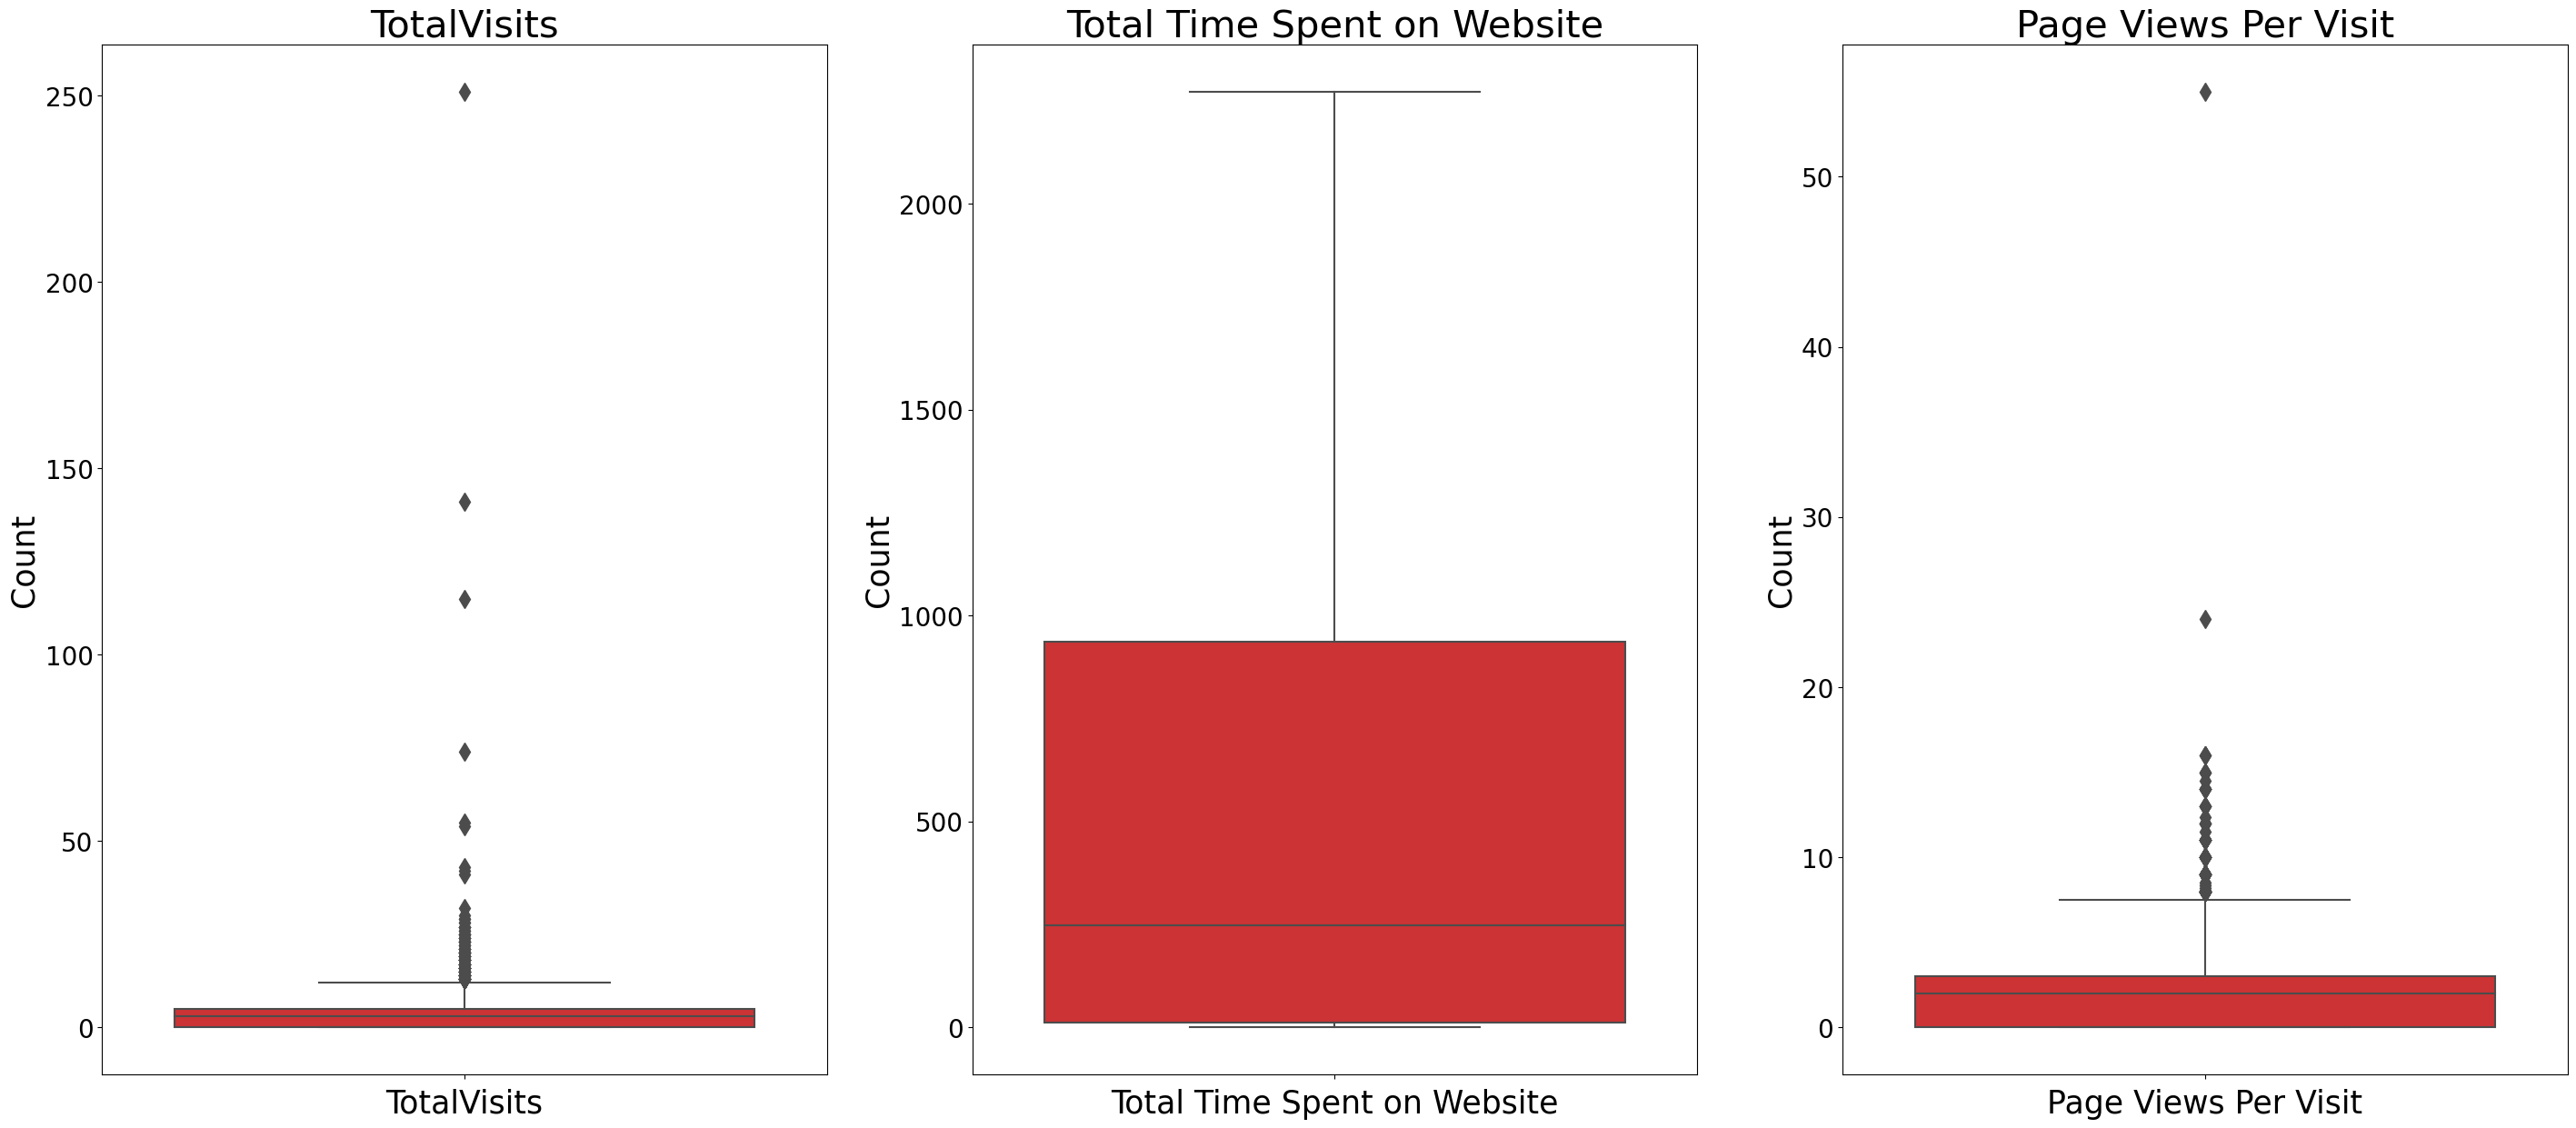

In [23]:
plt.figure(figsize=(35,50))

col_title={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}
for i in range(3):
    ax= plt.subplot(3,3,i+1)    
    sns.boxplot(y=leads[col_title[i]],data=leads,palette='Set1',fliersize=10)
    ax.set_title(col_title[i], fontsize=30)
    ax.tick_params(axis='x', labelsize=20) 
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel(col_title[i], fontsize=25)
    ax.set_ylabel('Count', fontsize=25)

#### We can now confirm that our dataset contains two outlier variables ('TotalVisits and Page', 'Views Per Visit'), based on the boxplots shown above.  we cannot drop these outliers because doing so could affect our analysis and model, we will create bins for these two outliers.

In [24]:
#dealing with 'TotalVisits' variable
# creating labels
TotalVisits_labels = ['TotalVisits_0', 'TotalVisits_1_2','TotalVisits_3_4','TotalVisits_5_6','TotalVisits_7_8','TotalVisits_9_10',
       'TotalVisits_11_12','TotalVisits_12_15','TotalVisits_above_15']

# creating bins for TotalVisits__labels
leads['TotalVisits'] = pd.cut(leads['TotalVisits'], bins=[-1,0.0,2,4,6,8,10,12,15,251], labels = TotalVisits_labels)
leads['TotalVisits'].value_counts()


TotalVisits_3_4         2426
TotalVisits_0           2326
TotalVisits_1_2         2075
TotalVisits_5_6         1249
TotalVisits_7_8          533
TotalVisits_9_10         278
TotalVisits_11_12        131
TotalVisits_above_15     120
TotalVisits_12_15        102
Name: TotalVisits, dtype: int64

In [25]:
# dealing with 'Page Views Per Visit' variable
# creating labels
pvp_labels=['Page_Views_Per_Visit_0','Page_Views_Per_Visit_1_2','Page_Views_Per_Visit_3_4',
            'Page_Views_Per_Visit_5_6','Page_Views_Per_Visit_7_8','Page_Views_Per_Visit_9_10','Page_Views_Per_Visit_above_10']

# creating bins for 'Page Views Per Visit'
leads['Page Views Per Visit'] = pd.cut(leads['Page Views Per Visit'], bins=[-1,0,2,4,6,8,10,60], labels = pvp_labels)
leads['Page Views Per Visit'].value_counts()

Page_Views_Per_Visit_1_2         3007
Page_Views_Per_Visit_3_4         2696
Page_Views_Per_Visit_0           2326
Page_Views_Per_Visit_5_6          851
Page_Views_Per_Visit_7_8          237
Page_Views_Per_Visit_9_10          73
Page_Views_Per_Visit_above_10      50
Name: Page Views Per Visit, dtype: int64

# Exploratory Data Analysis

In [26]:
# Lets start with the target variable and see if we have any data imbalance or not 
100*leads["Converted"].value_counts(normalize=True)

0    61.461039
1    38.538961
Name: Converted, dtype: float64

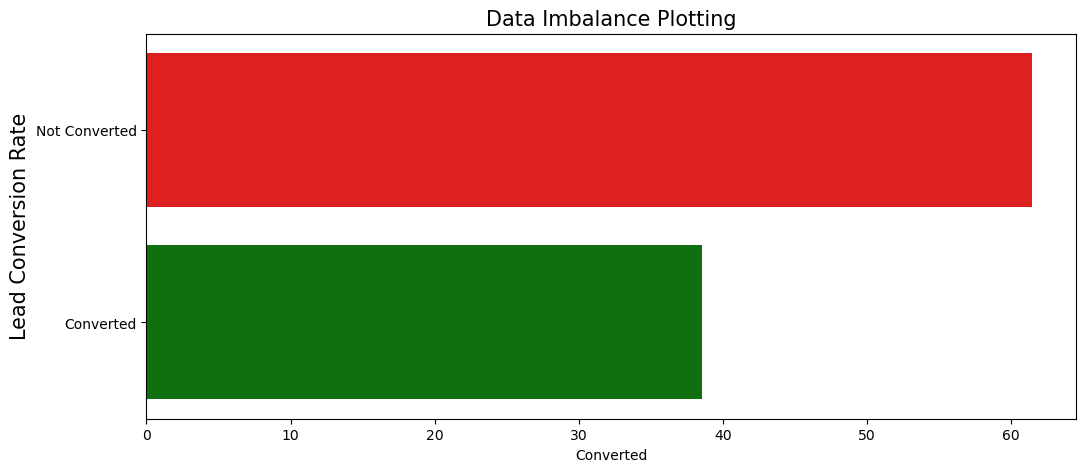

In [27]:
plt.figure(figsize= [12,5])
sns.barplot(y=["Not Converted","Converted"], x =100 * leads["Converted"].value_counts(normalize=True), palette = ["red","green"])
plt.ylabel("Lead Conversion Rate", size= 15)
plt.title("Data Imbalance Plotting", size= 15)
plt.show()

#### Insight: A dataset with class imbalance of 61.46% negative class and 38.54% positive class is considered moderately imbalanced.

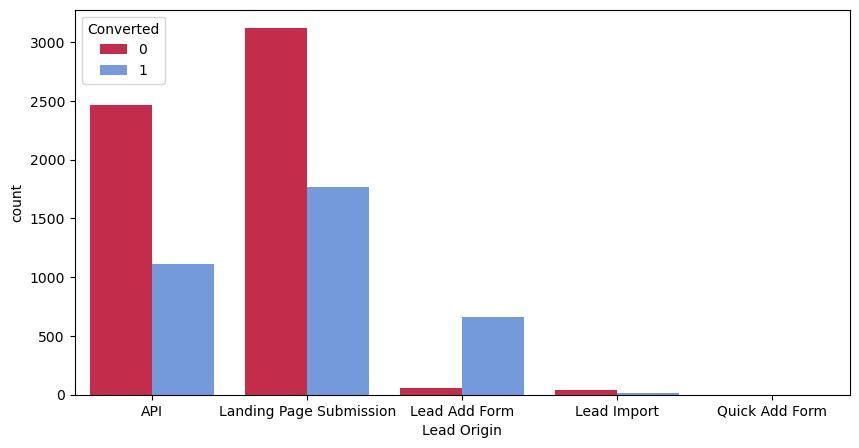

In [28]:
# Understanding lead conversion and lead origin
plt.figure(figsize = (10,5))
sns.countplot( x ="Lead Origin",hue = "Converted",data = leads,  palette=["crimson", "cornflowerblue"])
plt.show()

#### Insight: From the above graph we see that the major lead conversion from lead origin is from landing page submission.

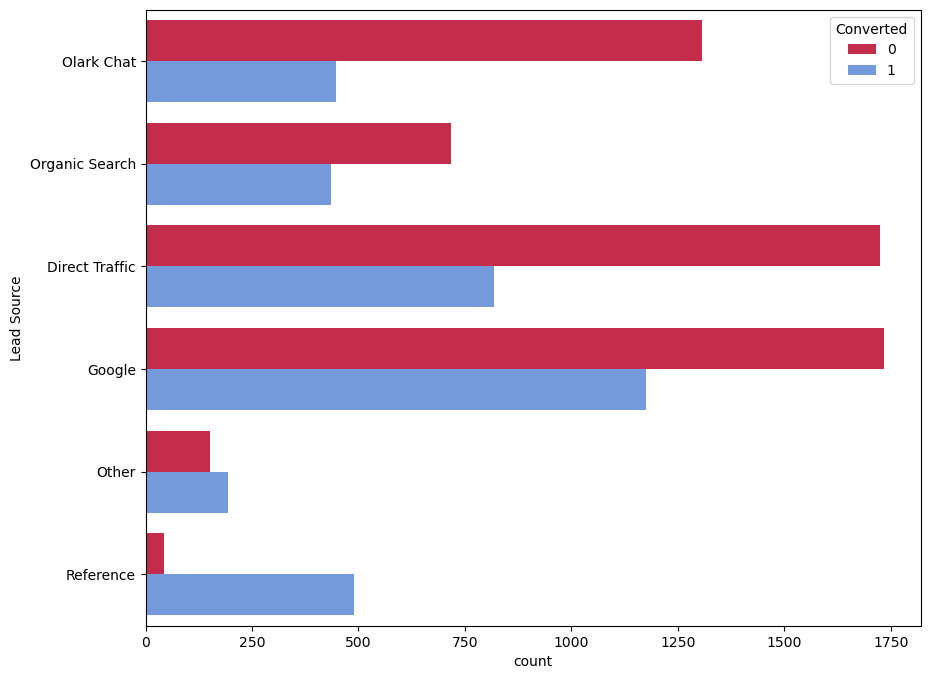

In [29]:
top_sources = leads['Lead Source'].value_counts().nlargest(10).index.tolist()

# Filter leads dataframe to only include top 10 Lead Sources
leads_filtered = leads[leads['Lead Source'].isin(top_sources)]

# Create countplot
plt.figure(figsize=(10, 8))
sns.countplot(y="Lead Source", hue="Converted", data=leads_filtered, palette=["crimson", "cornflowerblue"])
plt.show()

#### Insight: From the above graph we can infer that major lead conversion for lead source is from direct traffic and google.

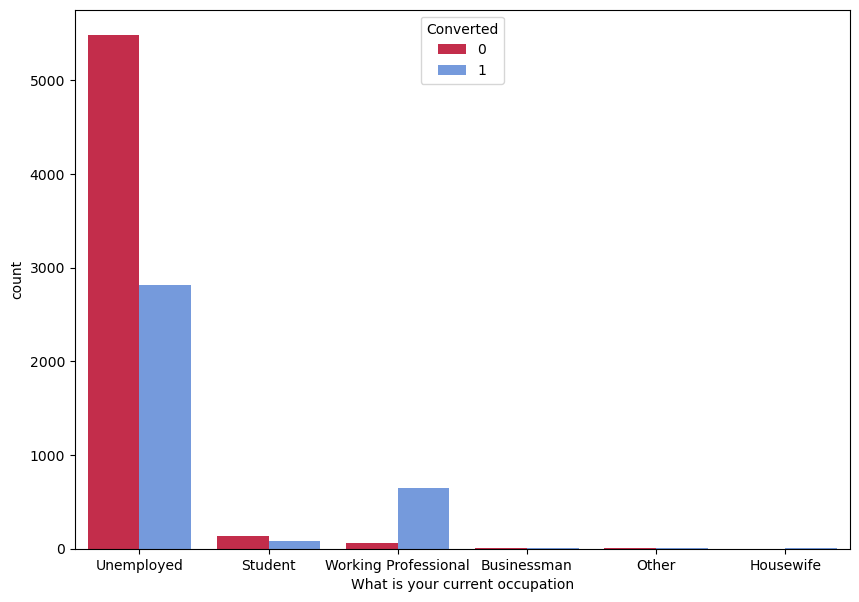

In [30]:
# Understanding lead conversion and current occupation type.
plt.figure(figsize = (10,7))
sns.countplot(x = "What is your current occupation",hue = "Converted", data = leads, palette=["crimson", "cornflowerblue"])
plt.show()

#### Insight: From the above graph we see that the major lead conversion for the segment current occupation is mostly the unemployed who have converted into a paying customer.


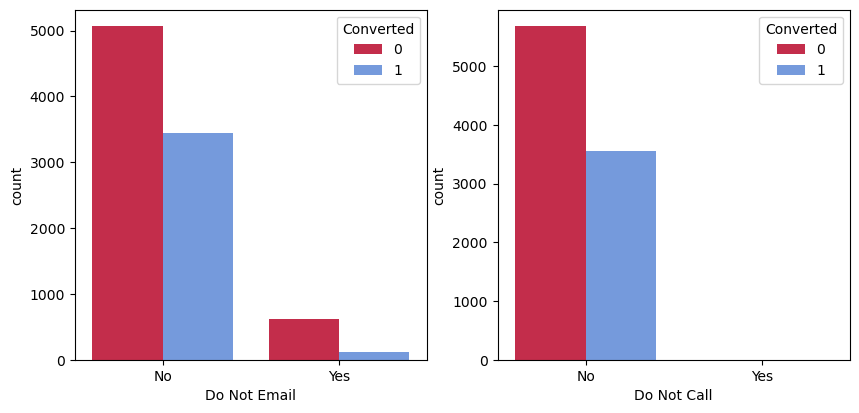

In [31]:
# Understanding lead conversion and do not email and do not call.
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
ax=sns.countplot(x = "Do Not Email",hue = "Converted", data = leads, palette=["crimson", "cornflowerblue"])

plt.xticks(ticks=[0, 1], labels=["No", "Yes"])

# Show the plot

plt.subplot(2,2,2)
sns.countplot(x = "Do Not Call",hue = "Converted", data = leads,palette=["crimson", "cornflowerblue"])
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

#### Insight: From the above graphs we see that conversion has happened where the customer has been emailed.Majority of the customers who have not opted for the Do not call, have been converted to paying customers.

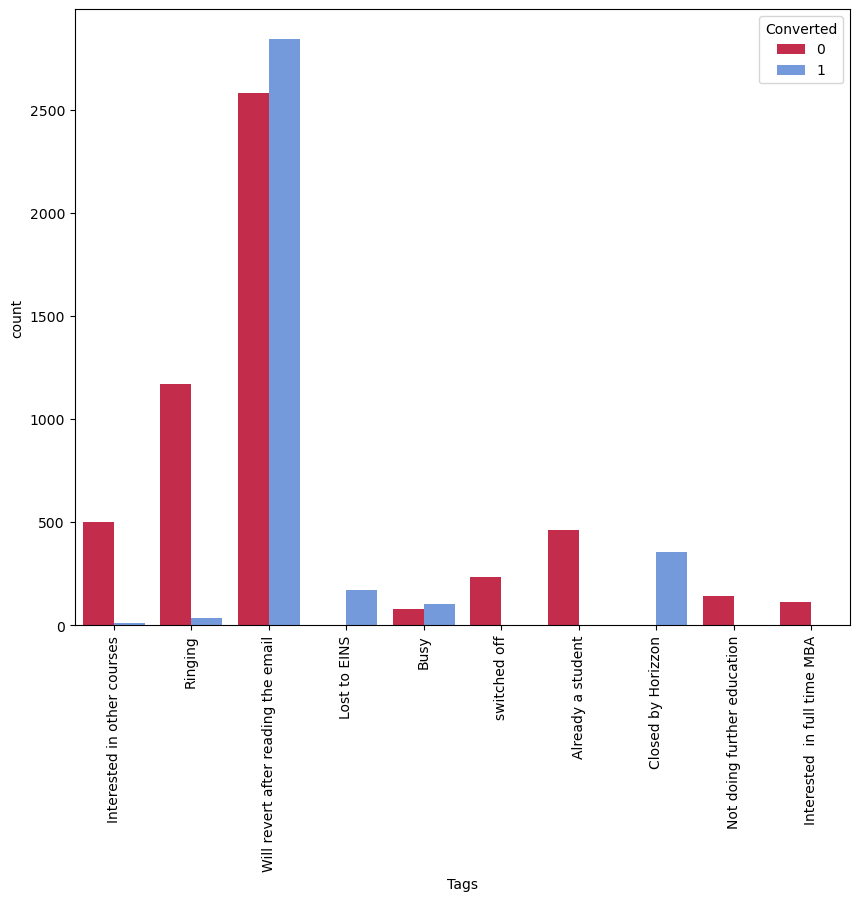

In [32]:
# Determine top 10 variables
top_sources = leads['Tags'].value_counts().nlargest(10).index.tolist()

# Filter DataFrame to include only top 10 variables
leads_filtered = leads[leads['Tags'].isin(top_sources)]

# Create vertical countplot
plt.figure(figsize=(10, 8))
sns.countplot(x="Tags", hue="Converted", data=leads_filtered, palette=["crimson", "cornflowerblue"])
plt.xticks(rotation=90)
plt.show()


#### Insight: Majority of leads tagged as ' Will revert after reading the email' are having the highest conversion rate, sales team should call such leads and constantly check status.

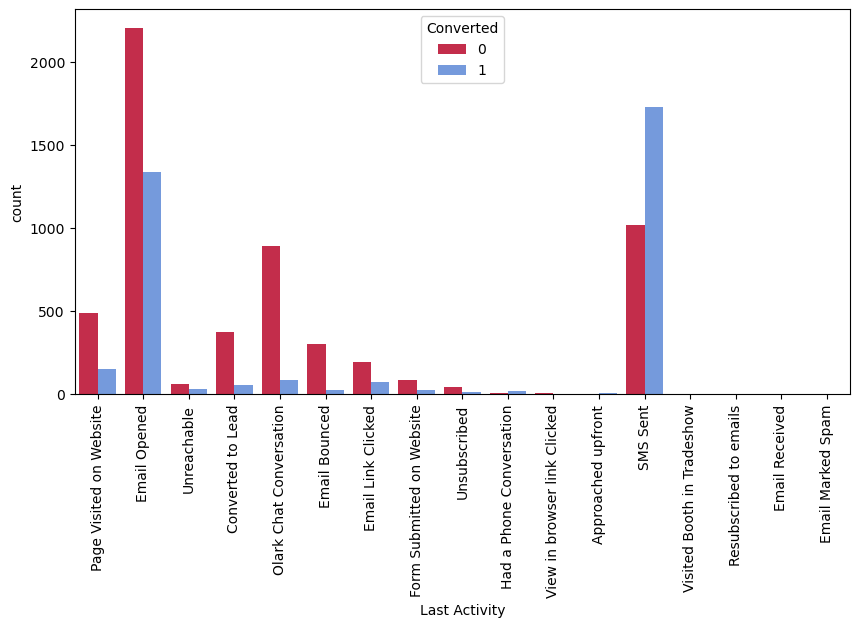

In [33]:
# Plotting Last Activity
plt.figure(figsize = (10,5))
sns.countplot( x ="Last Activity",hue = "Converted",data = leads,  palette=["crimson", "cornflowerblue"])
plt.xticks(rotation=90)
plt.show()

#### Insight: We should focus on boosting the conversion rate of those leads with the most recent action as Email Opened, as well as trying to improve the count of those with the most recent activity as SMS Sent.

### Inferences from the above graphs:
#### . The major lead conversion from lead origin is from landing page submission.
#### . The major lead conversion for lead source is from direct traffic and google.
#### . The major lead conversion for the segment current occupation is mostly the unemployed who have converted into a paying customer.
#### . Majority of the customers who have not opted for the Do not call, have been converted to paying customers.
#### . The person who has visited the website has major conversion.
#### . People who say they will respond after reading the email have the highest conversion rate.
#### . The conversion rate is high for those people who have been contacted by SMS rather than Email 

# Data Preparation

In [34]:
# we can drop these columns as we no longer need them

redundant=['Prospect ID','Lead Number','Last Activity','Tags','Last Notable Activity']

leads=leads.drop(redundant,axis=1)

#leads.head()

### Creating a Dummy Variable

In [35]:
temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation'], dtype='object')

In [36]:
#Creating a dummy variables and dropping the first level. 

cat = ['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation','TotalVisits','Page Views Per Visit']

#creating dummy variables data set
dummy = pd.get_dummies(leads[cat], drop_first=True)

# Adding these dummies to our original dataset
leads = pd.concat([leads,dummy],axis=1)

#dropping the duplicate columns
leads = leads.drop(cat, axis=1)

#viewing the dataset
leads.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1532,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,305,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1428,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [37]:
# Checking the Conversion Rate

print("Conversion rate is ", (sum(leads['Converted'])/len(leads['Converted'].index))*100)

Conversion rate is  38.53896103896104


### Splitting into train and test

In [38]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
# Putting response variable to y
y = leads['Converted']

print(y.head())
X.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64


,Do Not Email,Do Not Call,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1532,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,305,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1428,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [39]:
# Splitting the data into 70% and 30% for train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [40]:
# Feature scaling with standard scaler
scaler =StandardScaler()

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,TotalVisits_TotalVisits_1_2,TotalVisits_TotalVisits_3_4,TotalVisits_TotalVisits_5_6,TotalVisits_TotalVisits_7_8,TotalVisits_TotalVisits_9_10,TotalVisits_TotalVisits_11_12,TotalVisits_TotalVisits_12_15,TotalVisits_TotalVisits_above_15,Page Views Per Visit_Page_Views_Per_Visit_1_2,Page Views Per Visit_Page_Views_Per_Visit_3_4,Page Views Per Visit_Page_Views_Per_Visit_5_6,Page Views Per Visit_Page_Views_Per_Visit_7_8,Page Views Per Visit_Page_Views_Per_Visit_9_10,Page Views Per Visit_Page_Views_Per_Visit_above_10
1871,0,0,-0.885371,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.005716,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8105,0,0,1.365219,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Checking Correlation

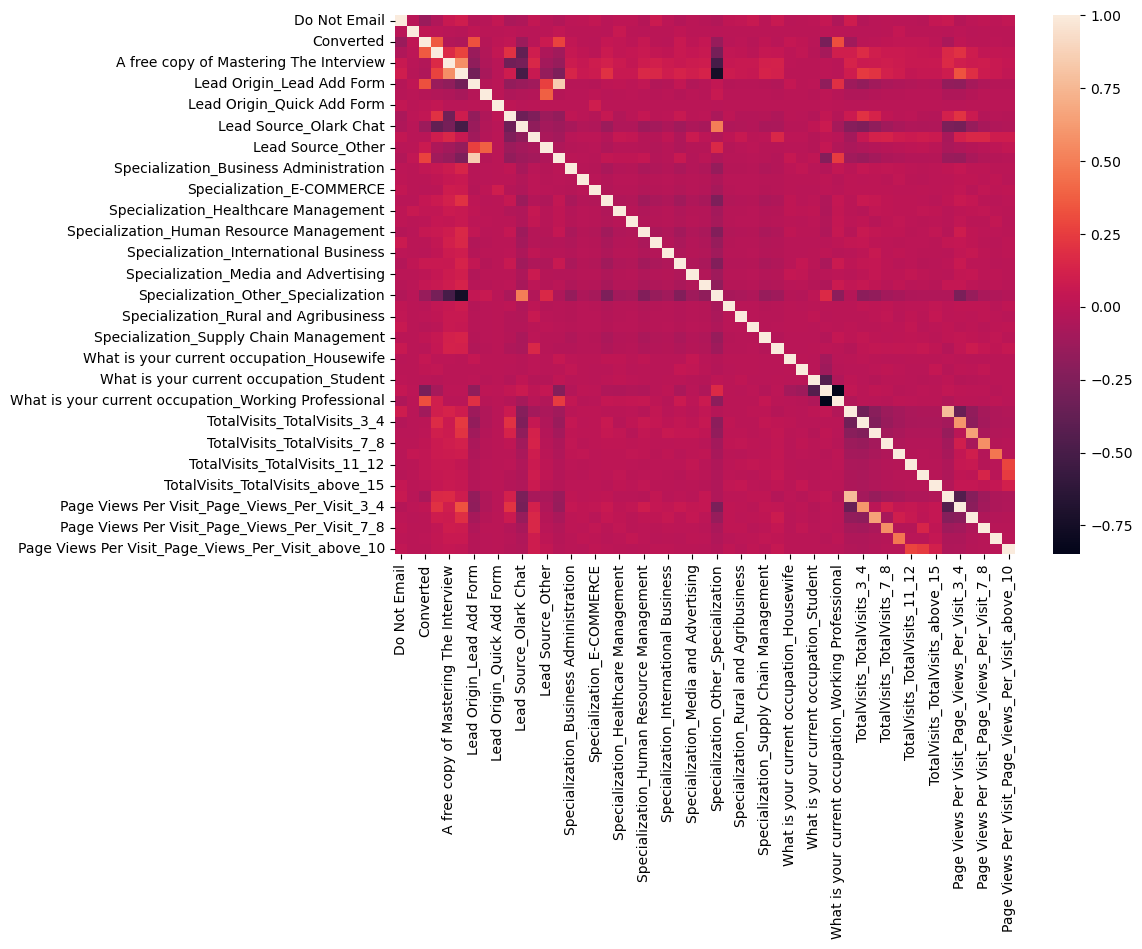

In [41]:
# plotting heatmap to check the correlation among varibles
plt.figure(figsize=(10,7))
sns.heatmap(leads.corr())
plt.show()

#### In the above heatmap since there are a lot of variables we couldn't find which features are highly correlated so we will now proceed with building our model and based on the p-values and VIFs.

# Model Building 

### Feature Selection Using RFE

In [42]:
logreg = LogisticRegression() 

In [43]:
# Using RFE to select 15 variables as output
rfe = RFE(logreg, n_features_to_select=15,step=1)
rfe = rfe.fit(X_train, y_train)

In [44]:
# List of features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 35),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Other', False, 32),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_E-Business', False, 25),
 ('Specialization_E-COMMERCE', False, 16),
 ('Specialization_Finance Management', False, 34),
 ('Specialization_Healthcare Management', False, 36),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 20),
 ('Specialization_IT Projects Management', False, 18),
 ('Specialization_International Business', False, 7),
 ('Speciali

In [45]:
# Asigning all the columns selected by RFE to the variable 'col'
col = X_train.columns[rfe.support_]
# Selecting columns selected by RFE
X_train_rfe = X_train[col]


### Logistic Regression Model 1

In [46]:
# Calculating VIF for the new model
vif = pd.DataFrame({'Features': X_train_rfe.columns,'VIF': [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]})
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                                             Features   VIF
3                           Lead Origin_Lead Add Form  4.37
5                               Lead Source_Reference  4.33
2                 Lead Origin_Landing Page Submission  4.22
11      Page Views Per Visit_Page_Views_Per_Visit_3_4  2.82
10      Page Views Per Visit_Page_Views_Per_Visit_1_2  2.58
7                 Specialization_Other_Specialization  1.74
12      Page Views Per Visit_Page_Views_Per_Visit_5_6  1.58
1                         Total Time Spent on Website  1.24
9   What is your current occupation_Working Profes...  1.17
0                                        Do Not Email  1.11
13     Page Views Per Visit_Page_Views_Per_Visit_9_10  1.07
14  Page Views Per Visit_Page_Views_Per_Visit_abov...  1.03
6               Specialization_Hospitality Management  1.02
4                             Lead Origin_Lead Import  1.01
8           What is your current occupation_Housewife  1.01


In [47]:
# Adding Constant Variable
X_train_sm = sm.add_constant(X_train_rfe)
# Creating Model
log1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
log1.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2958.3
Date:                Tue, 21 Mar 2023   Deviance:                       5916.7
Time:                        14:13:35   Pearson chi2:                 9.07e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3394
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7904      0.129      6.125      0.000       0.537       1.043
Do Not Email                                            -1.3701      0.160     -8.570      0.000      -1.683      -1.057
Total Time Spent on Website                              1.1022      0.038     29.078      0.000       1.028       1.176
Lead Origin_Landing Page Submission                     -1.0704      0.118     -9.096      0.000      -1.301      -0.840
Lead Origin_Lead Add Form                                3.9954      0.364     10.964      0.000       3.281       4.710
Lead Origin_Lead Import                                 -1.2574      0.538     -2.337      0.019      -2.312      -0.203
Lead Source_Reference                                   -1.3680      0.409     -3.343      0.001      -2.170      -0.566
Specialization_Hospitality Management                   -1.0377      0.318     -3.259      0.001      -1.662      -0.414
Specialization_Other_Specialization                     -1.2300      0.118    -10.431      0.000      -1.461      -0.999
What is your current occupation_Housewife               22.6253   1.32e+04      0.002      0.999   -2.58e+04    2.58e+04
What is your current occupation_Working Professional     2.6750      0.186     14.416      0.000       2.311       3.039
Page Views Per Visit_Page_Views_Per_Visit_1_2           -0.9436      0.107     -8.784      0.000      -1.154      -0.733
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.7186      0.114     -6.279      0.000      -0.943      -0.494
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.6472      0.143     -4.540      0.000      -0.927      -0.368
Page Views Per Visit_Page_Views_Per_Visit_9_10          -0.7355      0.365     -2.013      0.044      -1.452      -0.019
Page Views Per Visit_Page_Views_Per_Visit_above_10      -0.8750      0.445     -1.968      0.049      -1.746      -0.004
========================================================================================================================
"""

In [48]:
# We plan to drop the variables'What is your current occupation_Housewife' as it shows high P value
X_train_rfe.drop(['What is your current occupation_Housewife'],1 , inplace= True)

### Logistic Regression Model 2

In [49]:
# Calculating VIF for the new model
vif = pd.DataFrame({'Features': X_train_rfe.columns,'VIF': [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]})
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

                                             Features   VIF
3                           Lead Origin_Lead Add Form  4.37
5                               Lead Source_Reference  4.32
2                 Lead Origin_Landing Page Submission  4.22
10      Page Views Per Visit_Page_Views_Per_Visit_3_4  2.82
9       Page Views Per Visit_Page_Views_Per_Visit_1_2  2.58
7                 Specialization_Other_Specialization  1.74
11      Page Views Per Visit_Page_Views_Per_Visit_5_6  1.58
1                         Total Time Spent on Website  1.24
8   What is your current occupation_Working Profes...  1.17
0                                        Do Not Email  1.11
12     Page Views Per Visit_Page_Views_Per_Visit_9_10  1.07
13  Page Views Per Visit_Page_Views_Per_Visit_abov...  1.03
6               Specialization_Hospitality Management  1.02
4                             Lead Origin_Lead Import  1.01


In [50]:
# Adding Constant Variable
X_train_sm = sm.add_constant(X_train_rfe)
# Creating Model
log2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
log2.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2964.1
Date:                Tue, 21 Mar 2023   Deviance:                       5928.2
Time:                        14:13:35   Pearson chi2:                 9.10e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3382
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7913      0.129      6.134      0.000       0.538       1.044
Do Not Email                                            -1.3744      0.160     -8.598      0.000      -1.688      -1.061
Total Time Spent on Website                              1.1009      0.038     29.078      0.000       1.027       1.175
Lead Origin_Landing Page Submission                     -1.0671      0.118     -9.074      0.000      -1.298      -0.837
Lead Origin_Lead Add Form                                3.9980      0.364     10.969      0.000       3.284       4.712
Lead Origin_Lead Import                                 -1.2559      0.538     -2.335      0.020      -2.310      -0.202
Lead Source_Reference                                   -1.3569      0.409     -3.316      0.001      -2.159      -0.555
Specialization_Hospitality Management                   -1.0428      0.318     -3.275      0.001      -1.667      -0.419
Specialization_Other_Specialization                     -1.2334      0.118    -10.464      0.000      -1.464      -1.002
What is your current occupation_Working Professional     2.6695      0.186     14.388      0.000       2.306       3.033
Page Views Per Visit_Page_Views_Per_Visit_1_2           -0.9389      0.107     -8.751      0.000      -1.149      -0.729
Page Views Per Visit_Page_Views_Per_Visit_3_4           -0.7158      0.114     -6.259      0.000      -0.940      -0.492
Page Views Per Visit_Page_Views_Per_Visit_5_6           -0.6494      0.143     -4.557      0.000      -0.929      -0.370
Page Views Per Visit_Page_Views_Per_Visit_9_10          -0.7380      0.365     -2.020      0.043      -1.454      -0.022
Page Views Per Visit_Page_Views_Per_Visit_above_10      -0.8765      0.444     -1.972      0.049      -1.748      -0.005
========================================================================================================================
"""

#### Note: This model looks better now, so we can take it as our final model since it all the p-values are below 0.05 and the VIF values are also below 5

# Making Predictions on train dataset

In [51]:
#predicting train dataset with final model

y_train_pred=log2.predict(X_train_sm)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_prob,ID
1871,0,0.454270,1871
6795,0,0.080035,6795
3516,0,0.127956,3516
8105,0,0.640544,8105
3934,0,0.195154,3934


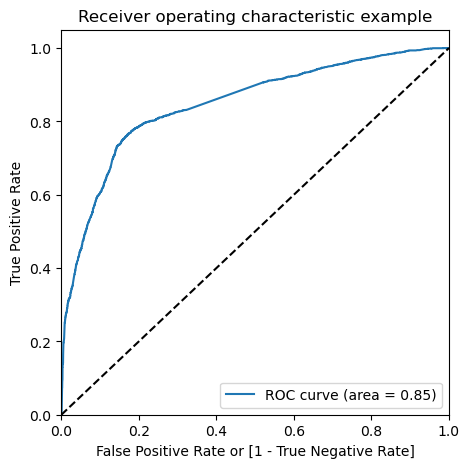

In [52]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The area under ROC curve is 0.85 which is close to 1 that indicates we have built a good predective model

In [53]:
#Let's create columns with different probability cutoffs 

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_prob'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head(10)

,Converted,Converted_prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.454270,1871,1,1,1,1,1,0,0,0,0,0
6795,0,0.080035,6795,1,0,0,0,0,0,0,0,0,0
3516,0,0.127956,3516,1,1,0,0,0,0,0,0,0,0
8105,0,0.640544,8105,1,1,1,1,1,1,1,0,0,0
3934,0,0.195154,3934,1,1,0,0,0,0,0,0,0,0
4844,1,0.970848,4844,1,1,1,1,1,1,1,1,1,1
3297,0,0.142445,3297,1,1,0,0,0,0,0,0,0,0
8071,1,0.997024,8071,1,1,1,1,1,1,1,1,1,1
987,0,0.328703,987,1,1,1,1,0,0,0,0,0,0
7423,1,0.688411,7423,1,1,1,1,1,1,1,0,0,0


In [54]:
# Using accuracy sensitivity and specificity to calculate probability cutoff.
cutoff_df = pd.DataFrame( columns = ['Probability','accuracy','Sensitvity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  accuracy  Sensitvity  Specificity
0.0          0.0  0.381262    1.000000     0.000000
0.1          0.1  0.454855    0.987835     0.126437
0.2          0.2  0.743506    0.828062     0.691404
0.3          0.3  0.798547    0.780211     0.809845
0.4          0.4  0.808751    0.733171     0.855322
0.5          0.5  0.792517    0.641525     0.885557
0.6          0.6  0.782313    0.561638     0.918291
0.7          0.7  0.760513    0.456610     0.947776
0.8          0.8  0.730829    0.332117     0.976512
0.9          0.9  0.713358    0.264396     0.990005


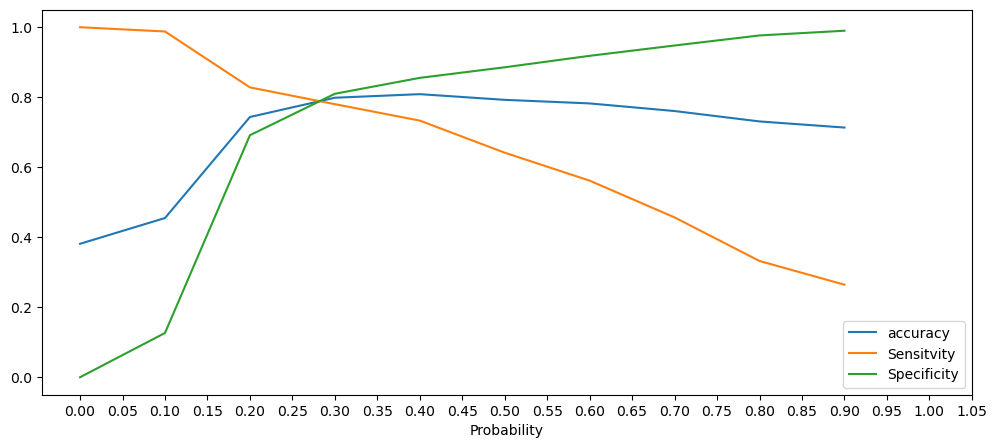

In [55]:
# Let's plot the values of accuracy, sensitivity, and specificity for differnet probablities
fig, ax = plt.subplots(figsize=(12, 5))
cutoff_df.plot.line(x='Probability', y=['accuracy', 'Sensitvity', 'Specificity'], ax=ax)
ax.set_xticks(np.arange(0, 1.1, 0.05))
plt.show()

In [56]:
# Using 0.25 as optimal probability cutoff to predict the results

y_train_pred_final['Predicted']=y_train_pred_final['Converted_prob'].map(lambda x:1 if x >0.25 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.454270,1871,1,1,1,1,1,0,0,0,0,0,1
6795,0,0.080035,6795,1,0,0,0,0,0,0,0,0,0,0
3516,0,0.127956,3516,1,1,0,0,0,0,0,0,0,0,0
8105,0,0.640544,8105,1,1,1,1,1,1,1,0,0,0,1
3934,0,0.195154,3934,1,1,0,0,0,0,0,0,0,0,0


In [57]:
# Creating confusion matrix to find all the metrics 

confusion=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion

array([[3078,  924],
       [ 490, 1976]], dtype=int64)

In [58]:
# Checking score of train dataset 
#specificity score
Specificity_train =round((confusion[0,0]/(confusion[0,0]+confusion[0,1])*100),2) 

#  Pecision score
Precision_train = round((confusion[1,1]/(confusion[0,1]+confusion[1,1])*100),2)

#  Recall score
Recall_train = round((confusion[1,1]/(confusion[1,0]+confusion[1,1])*100),2)

print('-'*100) 
print('Specificity Score:',Specificity_train) 
print('-'*100)
print('Precision Score:',Precision_train) 
print('-'*100)
print('Sensitivity/Recall Score:',Recall_train)  
print('-'*100)

----------------------------------------------------------------------------------------------------
Specificity Score: 76.91
----------------------------------------------------------------------------------------------------
Precision Score: 68.14
----------------------------------------------------------------------------------------------------
Sensitivity/Recall Score: 80.13
----------------------------------------------------------------------------------------------------


In [59]:
# Check the overall accuracy on train dataset
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7813852813852814

# Making Prediction on Test Dataset

In [60]:
# Using standard scalar for rescaling variable 'Total Time Spent on Website'

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [61]:
# Using our final model for prediction on test dataset

# Taking the same column train set has
test_cols=X_train_sm.columns[1:] 

# Updating it in the final test set
X_test_final=X_test[test_cols]  

# Adding constant to the final test set
X_test_final=sm.add_constant(X_test_final)

# Predicting the final test set
y_pred_test=log2.predict(X_test_final)      

In [62]:
# Creating a new dataset and saving the prediction values in it
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Prob':y_pred_test,'ID':y_test.index})

y_test_pred_final.head(10) 

,Converted,Converted_Prob,ID
4269,1,0.650147,4269
2376,1,0.772812,2376
7766,1,0.876043,7766
9199,0,0.195154,9199
4359,1,0.921121,4359
9186,1,0.339133,9186
1631,1,0.535094,1631
8963,1,0.139923,8963
8007,0,0.218676,8007
5324,1,0.161915,5324


# Model Evaluation 

In [63]:
# The optimal cutoff after ploting three matrics is 0.25

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Prob'].map(lambda x:1 if x >0.25 else 0 )

y_test_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
4269,1,0.650147,4269,1
2376,1,0.772812,2376,1
7766,1,0.876043,7766,1
9199,0,0.195154,9199,0
4359,1,0.921121,4359,1


In [64]:
# Creating a confusion matrix for test dataset 

confusion_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_test

array([[1257,  420],
       [ 218,  877]], dtype=int64)

In [65]:
# Checking scores of test dataset
#specificity score
Specificity_train =round((confusion_test[0,0]/(confusion_test[0,0]+confusion_test[0,1])*100),2) 

#  Pecision score
Precision_train = round((confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])*100),2)

#  Recall score
Recall_train = round((confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])*100),2)

print('-'*100) 
print('Specificity Score:',Specificity_train) 
print('-'*100)
print('Precision Score:',Precision_train) 
print('-'*100)
print('Sensitivity/Recall Score:',Recall_train)  
print('-'*100)

----------------------------------------------------------------------------------------------------
Specificity Score: 74.96
----------------------------------------------------------------------------------------------------
Precision Score: 67.62
----------------------------------------------------------------------------------------------------
Sensitivity/Recall Score: 80.09
----------------------------------------------------------------------------------------------------


In [66]:
# Checking accuracy of test dataset

Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)
print('Test set Accuracy:',Accuracy_test)

Test set Accuracy: 76.98


## Evaluating Final Results

In [67]:
# Adding new columns for lead score and lead number

y_test_pred_final['Lead Number']=leads.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Prob'].apply(lambda x:round(x*100))

y_test_pred_final.head(10)

,Converted,Converted_Prob,ID,Predicted,Lead Number,Lead Score
4269,1,0.650147,4269,1,0,65
2376,1,0.772812,2376,1,0,77
7766,1,0.876043,7766,1,0,88
9199,0,0.195154,9199,0,0,20
4359,1,0.921121,4359,1,0,92
9186,1,0.339133,9186,1,0,34
1631,1,0.535094,1631,1,0,54
8963,1,0.139923,8963,0,0,14
8007,0,0.218676,8007,0,0,22
5324,1,0.161915,5324,0,0,16


### Side by Side Comparison between Train data set and Test metrics

In [68]:

#specificity score
Specificity_train =round((confusion[0,0]/(confusion[0,0]+confusion[0,1])*100),2) 

#  Pecision score
Precision_train = round((confusion[1,1]/(confusion[0,1]+confusion[1,1])*100),2)

#  Recall score
Recall_train = round((confusion[1,1]/(confusion[1,0]+confusion[1,1])*100),2)
print('Train Data Set metrics:')
print('-'*100)
print('Specificity Score:',Specificity_train) 
print('-'*100)
print('Precision Score:',Precision_train) 
print('-'*100)
print('Sensitivity/Recall Score:',Recall_train)  
print('')

#specificity score
Specificity_train =round((confusion_test[0,0]/(confusion_test[0,0]+confusion_test[0,1])*100),2) 

#  Pecision score
Precision_train = round((confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])*100),2)

#  Recall score
Recall_train = round((confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])*100),2)
print('')
print('Test Data Set metrics:')
print('-'*100)
print('Specificity Score:',Specificity_train) 
print('-'*100)
print('Precision Score:',Precision_train) 
print('-'*100)
print('Sensitivity/Recall Score:',Recall_train)  
print('-'*100)


Train Data Set metrics:
----------------------------------------------------------------------------------------------------
Specificity Score: 76.91
----------------------------------------------------------------------------------------------------
Precision Score: 68.14
----------------------------------------------------------------------------------------------------
Sensitivity/Recall Score: 80.13


Test Data Set metrics:
----------------------------------------------------------------------------------------------------
Specificity Score: 74.96
----------------------------------------------------------------------------------------------------
Precision Score: 67.62
----------------------------------------------------------------------------------------------------
Sensitivity/Recall Score: 80.09
----------------------------------------------------------------------------------------------------
